In [1]:
# Competition hosted by Kaggle
# URL: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# Predicting the sales price of a house, using various regression techniques.

In [2]:
#%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.show()
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
combine = [train,test]

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

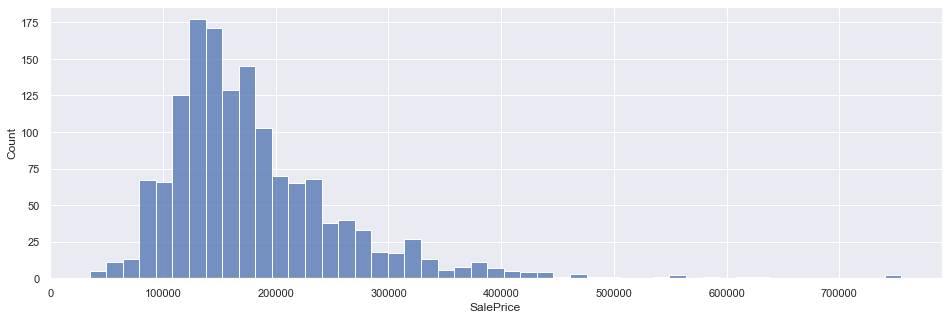

In [7]:
plt.figure(figsize=(16,5))
sns.histplot(train['SalePrice'])

In [8]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
# Visualising correlation between numerical variables.

In [10]:
corr_matrix = train.corr()

In [11]:
columns = corr_matrix.nlargest(10,'SalePrice')['SalePrice'].index

In [12]:
cm = np.corrcoef(train[columns].values.T)

(10.0, 0.0)

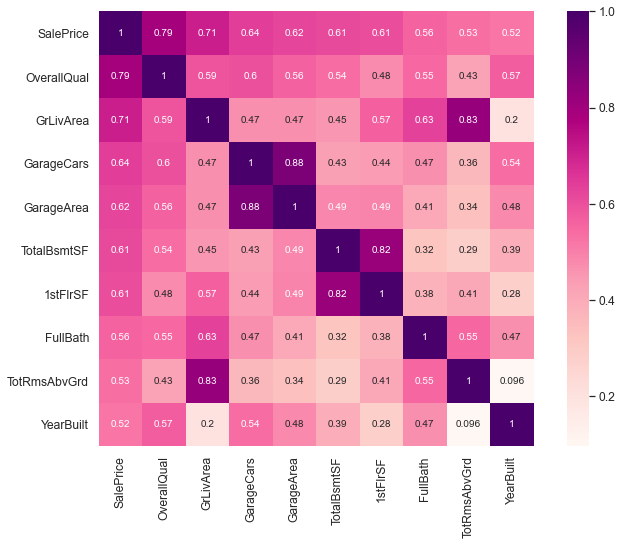

In [13]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.1)
sns.heatmap(cm,cbar=True, annot = True, square=True, cmap = "RdPu",annot_kws = {"size": 10},
           yticklabels=columns.values, xticklabels=columns.values)
plt.ylim(10,0)

In [14]:
# Graphs for the top couple of correlated variables to see if there are any outliers. 

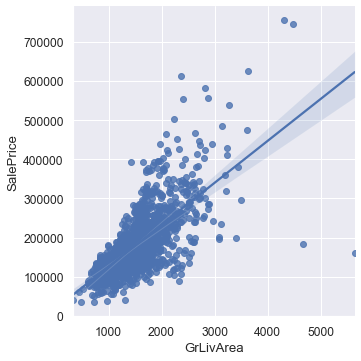

In [15]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

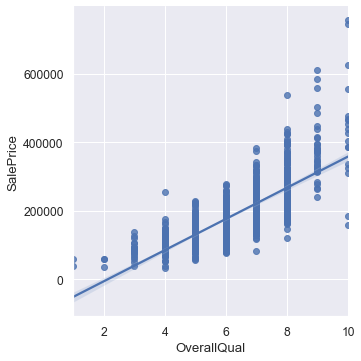

In [16]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

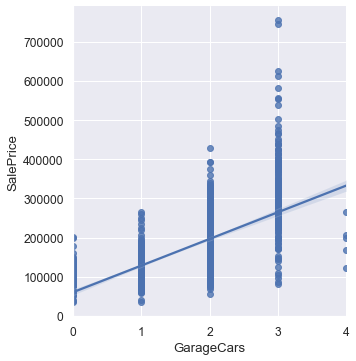

In [17]:
sns.lmplot(x='GarageCars',y='SalePrice',data=train)

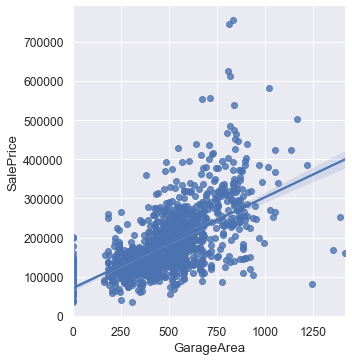

In [18]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

In [19]:
train.loc[train['GrLivArea'] > 4000,['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


In [20]:
# Drop the outliers found in the first graph
train.drop(523,inplace=True)
train.drop(1298,inplace=True)

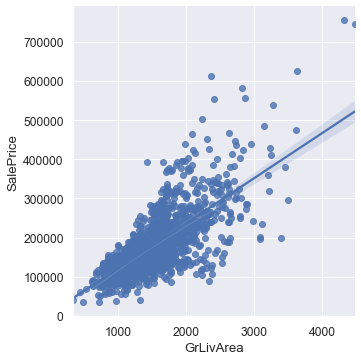

In [21]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

In [22]:
train.loc[train['GrLivArea'] > 4000,['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
691,4316,755000
1182,4476,745000


In [23]:
for dataset in combine:
    print(pd.isna(dataset).sum().nlargest(40))

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
dtype: int64
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78


In [24]:
# Filling in the missing values Most of these will be a simple fix.

In [25]:
# Working on the train set

In [26]:
pd.isna(train).sum().nlargest(32)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
dtype: int64

In [27]:
# PoolQC NA represent no pool, so lets fill that in. 

In [28]:
NoneFill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure','GarageQual','GarageCond',
           'BsmtExposure','MasVnrType']
for column in NoneFill:
    train[column].fillna("None",inplace=True)
    pd.isna(train[NoneFill]).sum()

In [29]:
# I will have to impute the value for LotFrontage.
# I could look at the average lotfrontage for the neighbourhood.

In [30]:
# Fills in NA values using average LotFrontage for each neighborhood.
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [31]:
train['GarageYrBlt'].fillna(0,inplace=True)
pd.isna(train['GarageYrBlt']).sum()

0

In [32]:
pd.isna(train).sum().nlargest(10)

MasVnrArea     8
Electrical     1
Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
dtype: int64

In [33]:
train['MasVnrArea'].fillna(0,inplace=True)
pd.isna(train['MasVnrArea']).sum()

0

In [34]:
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

In [35]:
pd.isna(train).sum().nlargest(10)

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

In [36]:
# Now I will begin filling in the missing values for the test set
pd.isna(test).sum().nlargest(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
KitchenQual        1
GarageCars         1
GarageArea         1
SaleType           1
Id                 0
MSSubClass         0
dtype: int64

In [37]:
# Fill missing values with None
fillnone = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageType',
           'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [38]:
for i in fillnone:
    test[i].fillna('None',inplace=True)
    print(pd.isna(test[i]).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [39]:
pd.isna(test).sum().nlargest(20)

LotFrontage     227
GarageYrBlt      78
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
SaleType          1
Id                0
dtype: int64

In [40]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [41]:
test.loc[test['MasVnrArea'] == 198.0, 'MasVnrType']

245       Stone
421     BrkFace
1085      Stone
1150        NaN
1372    BrkFace
1442      Stone
Name: MasVnrType, dtype: object

In [42]:
test.iloc[1150]

Id                  2611
MSSubClass            20
MSZoning              RL
LotFrontage          124
LotArea            27697
                  ...   
MiscVal                0
MoSold                11
YrSold              2007
SaleType             COD
SaleCondition    Abnorml
Name: 1150, Length: 80, dtype: object

In [43]:
test.loc[test['Id'] == 2611,'MasVnrType'] = 'Stone'

In [44]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [45]:
test['MasVnrType'].fillna('None',inplace=True)
print(pd.isna(test['MasVnrType']).sum())

test['MasVnrArea'].fillna(0,inplace=True)
print(pd.isna(test['MasVnrArea']).sum())

0
0


In [46]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea


In [47]:
pd.isna(test).sum().nlargest(20)

LotFrontage     227
GarageYrBlt      78
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
SaleType          1
Id                0
MSSubClass        0
LotArea           0
dtype: int64

In [48]:
# Carry on fixing null values. 

# Then start making all the data model friendly. (Dummy variables, label encoder)

In [49]:
# Fill in the missing Lot Frontage values by using the average lot frontage for each neighbourhood
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [50]:
test['GarageYrBlt'].fillna(0,inplace=True)
pd.isna(test['GarageYrBlt']).sum()

0

In [51]:
# Fill in the missing MSZoning values by using the mode MSZoning for each MSSubClass
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
pd.isna(test['MSZoning']).sum()

0

In [52]:
pd.isna(test).sum().nlargest(15)

Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
Id              0
dtype: int64

In [53]:
modefill = ['Utilities','BsmtFullBath','BsmtHalfBath','Exterior1st','Exterior2nd','SaleType','KitchenQual']

for i in modefill:
    test[i].fillna(test[i].mode()[0],inplace = True)

In [54]:
pd.isna(test).sum().nlargest(9)

Functional     2
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
GarageCars     1
GarageArea     1
Id             0
MSSubClass     0
dtype: int64

In [55]:
test['Functional'].fillna('Typ',inplace = True) 

In [56]:
zerofill = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']
for i in zerofill:
    test[i].fillna(0,inplace = True)

In [57]:
pd.isna(test).sum().nlargest(3)

Id            0
MSSubClass    0
MSZoning      0
dtype: int64

In [58]:
# Done with all the NA values

In [59]:
# Fix skewed variables
from scipy import stats

In [60]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = list(train.select_dtypes(include=numeric_dtypes).drop('SalePrice',axis=1).columns)

In [61]:
num_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [62]:
full_df = train.append(test)

In [63]:
skew_features = full_df[num_features].apply(lambda x: stats.skew(x)).sort_values(ascending=False)

In [64]:
skew_features = skew_features[abs(skew_features) > 0.75]
skew_features

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
MSSubClass        1.375131
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.056433
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
GarageYrBlt      -3.904632
dtype: float64

In [65]:
for feat in skew_features.index:
    full_df[feat] = np.log1p(full_df[feat])

In [66]:
ind = len(train)
train = full_df.iloc[:ind]
test = full_df.iloc[ind:]
combine = [train,test]

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
# Label encoding the following columns
encodecols = ['MSSubClass','Street','Alley','Utilities','LandSlope','ExterQual','ExterCond',
              'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
             'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',
              'GarageQual','GarageCond','PoolQC','Fence']
for dataset in combine:
    for i in encodecols:
        lbe = LabelEncoder()
        lbe.fit(list(dataset[i].values))
        dataset[i] = lbe.transform(list(dataset[i].values))

C:\Users\clint\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [69]:
full_df = train.append(test)

In [70]:
full_df = pd.get_dummies(full_df,drop_first=True)

In [71]:
ind = len(train)

In [72]:
train = full_df.iloc[:ind]

In [73]:
test = full_df.iloc[ind:]

In [74]:
combine = [train,test]

In [75]:
temp_train_Id = train['Id']
temp_test_Id = test['Id']

In [76]:
for dataset in combine:
    dataset.drop('Id',axis=1,inplace=True)

C:\Users\clint\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,Normalizer,RobustScaler
scaler = StandardScaler()

In [78]:
# Scaling the data. Fitting and transforming on the train set, and only transforming the test set
pd.set_option('mode.chained_assignment',None)
for col in (train.columns):
    if col != 'SalePrice':
        train.loc[:,col] = scaler.fit_transform(train.loc[:,col].values.reshape(-1,1))
        test.loc[:,col] = scaler.transform(test.loc[:,col].values.reshape(-1,1))
        
    else:
        pass
pd.reset_option('mode.chained_assignment')
#train['SalePrice'] = scaler.fit_transform(train[col].values.reshape(-1,1))

In [79]:
test.loc[:,'SalePrice'] = test['SalePrice'].fillna(0)

C:\Users\clint\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [80]:
train.loc[:,'SalePrice'] = train['SalePrice'].apply(lambda x: np.log(x))

In [81]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [82]:
# Now the data has been cleaned and readied, Ill start testing various models
from sklearnex import patch_sklearn
patch_sklearn() # https://intel.github.io/scikit-learn-intelex/algorithms.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [83]:
# Lets create a dict that contains multiple models.

In [84]:
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error

C:\Users\clint\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
reg = LazyRegressor(verbose=0,custom_metric=mean_squared_error)

In [88]:
models_lazy,predictions_lazy = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 50/50 [00:20<00:00,  2.48it/s]


In [89]:
print(models_lazy)

                                                              Adjusted R-Squared  \
Model                                                                              
LassoLarsCV                                                                 0.83   
LassoCV                                                                     0.83   
ElasticNetCV                                                                0.83   
GradientBoostingRegressor                                                   0.82   
OrthogonalMatchingPursuitCV                                                 0.82   
OrthogonalMatchingPursuit                                                   0.82   
LarsCV                                                                      0.82   
RidgeCV                                                                     0.81   
Ridge                                                                       0.80   
LassoLarsIC                                                                 

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
import xgboost as xgb

In [91]:
# Selected the following models by looking at which models performed the best in the lazy regression, and models I usually use. 
model_params = {
    'SVR':{
        'model':SVR(gamma='auto'),
        'params':{
            'C':np.arange(0.5,50,0.5)
        }
    },
    'RandomForestRegressor':{
        'model':RandomForestRegressor(random_state=42),
        'params':{
            'n_estimators':[300,2000],
            'max_depth':[8],
            'min_samples_split':[3],
            'min_samples_leaf':[3],
            'oob_score':[False]
        }
    
    },
    'KNeighborsRegressor':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[10],
            'leaf_size':[20],
            'p':[2,6,10]
        }
    },
    'Ridge':{
        'model':Ridge(random_state=42),
        'params':{
            'alpha':[0.00005,0.0005,0.005,0.05,1,2,5,10,20,0.1,50]
        }
    },
    'Lasso':{
        'model':Lasso(random_state=42),
        'params':{
            'alpha':[0.00005,0.0005,0.005,0.05]
        }
    },
    'GradientBoostingRegressor':{
        'model':GradientBoostingRegressor(random_state=42),
        'params':{
            'n_estimators':[500,1500,3000],
            'max_depth':[3],
            'min_samples_split':[3],
            'min_samples_leaf':[15],
            'loss':['huber']
        }
    },
    'ExtraTreesClassifier':{
        'model':ExtraTreesRegressor(random_state=42),
        'params':{
            'n_estimators':[500,1500,3000],
            'max_depth':[8],
            'min_samples_split':[3],
            'min_samples_leaf':[3]
        }
    },
    'XGBRegressor':{
        'model':xgb.XGBRegressor(random_state=42),
        'params':{
            'n_estimators':[2200,3000,3500],
            'gamma':[0.01,0.04],
            'learning_rate':[0.07],
            'max_depth':[1,3]
        }
    }
}

In [92]:
# Fitting all the models above using the grid search cross validation method.
import time
models = []
all_scores = []
scores = []
for model_name, mp in model_params.items():
    start_time = time.time()
    clf = GridSearchCV(mp['model'],mp['params'],verbose=6,cv=15,scoring='neg_root_mean_squared_error',n_jobs=15)
    clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
    models.append({
        model_name:clf
    })
    all_scores.append(pd.DataFrame(clf.cv_results_))
    print('Model done: ' + model_name)
    end_time = time.time()
    print(model_name + f" Took {round(end_time-start_time,2)} seconds long.")

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


Fitting 15 folds for each of 99 candidates, totalling 1485 fits


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    3.8s
[Parallel(n_jobs=15)]: Done  83 tasks      | elapsed:    7.1s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   11.6s
[Parallel(n_jobs=15)]: Done 283 tasks      | elapsed:   17.3s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:   24.2s
[Parallel(n_jobs=15)]: Done 583 tasks      | elapsed:   32.5s
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:   42.2s
[Parallel(n_jobs=15)]: Done 983 tasks      | elapsed:   53.2s
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  1.1min
[Parallel(n_jobs=15)]: Done 1485 out of 1485 | elapsed:  1.3min finished


Model done: SVR
SVR Took 79.15 seconds long.
Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   7 out of  30 | elapsed:    3.1s remaining:   10.3s
[Parallel(n_jobs=15)]: Done  13 out of  30 | elapsed:    3.2s remaining:    4.2s
[Parallel(n_jobs=15)]: Done  19 out of  30 | elapsed:   22.8s remaining:   13.2s
[Parallel(n_jobs=15)]: Done  25 out of  30 | elapsed:   23.1s remaining:    4.5s
[Parallel(n_jobs=15)]: Done  30 out of  30 | elapsed:   24.1s finished


Model done: RandomForestRegressor
RandomForestRegressor Took 37.5 seconds long.
Fitting 15 folds for each of 3 candidates, totalling 45 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  24 out of  45 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=15)]: Done  32 out of  45 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=15)]: Done  40 out of  45 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=15)]: Done  45 out of  45 | elapsed:    1.1s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


Model done: KNeighborsRegressor
KNeighborsRegressor Took 1.26 seconds long.
Fitting 15 folds for each of 11 candidates, totalling 165 fits


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 136 out of 165 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=15)]: Done 165 out of 165 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


Model done: Ridge
Ridge Took 0.55 seconds long.
Fitting 15 folds for each of 4 candidates, totalling 60 fits


[Parallel(n_jobs=15)]: Done  20 out of  60 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=15)]: Done  42 out of  60 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=15)]: Done  60 out of  60 | elapsed:    0.2s finished


Model done: Lasso
Lasso Took 0.49 seconds long.
Fitting 15 folds for each of 3 candidates, totalling 45 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  24 out of  45 | elapsed:   26.9s remaining:   23.5s
[Parallel(n_jobs=15)]: Done  32 out of  45 | elapsed:  1.1min remaining:   27.4s
[Parallel(n_jobs=15)]: Done  40 out of  45 | elapsed:  1.1min remaining:    8.4s
[Parallel(n_jobs=15)]: Done  45 out of  45 | elapsed:  1.1min finished


Model done: GradientBoostingRegressor
GradientBoostingRegressor Took 72.97 seconds long.
Fitting 15 folds for each of 3 candidates, totalling 45 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  24 out of  45 | elapsed:   33.9s remaining:   29.7s
[Parallel(n_jobs=15)]: Done  32 out of  45 | elapsed:  1.4min remaining:   34.3s
[Parallel(n_jobs=15)]: Done  40 out of  45 | elapsed:  1.4min remaining:   10.6s
[Parallel(n_jobs=15)]: Done  45 out of  45 | elapsed:  1.4min finished


Model done: ExtraTreesClassifier
ExtraTreesClassifier Took 114.43 seconds long.
Fitting 15 folds for each of 12 candidates, totalling 180 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:   29.7s
[Parallel(n_jobs=15)]: Done  83 tasks      | elapsed:  2.9min
[Parallel(n_jobs=15)]: Done 180 out of 180 | elapsed:  5.7min finished


Model done: XGBRegressor
XGBRegressor Took 345.28 seconds long.


In [93]:
df_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [94]:
df_results[['model','best_score']].values

array([['SVR', -0.18263558359023335],
       ['RandomForestRegressor', -0.13895318789179284],
       ['KNeighborsRegressor', -0.19704438005440178],
       ['Ridge', -0.11564505642895583],
       ['Lasso', -0.11300161219596903],
       ['GradientBoostingRegressor', -0.11681687105562358],
       ['ExtraTreesClassifier', -0.13906634016160496],
       ['XGBRegressor', -0.11762005387625522]], dtype=object)

In [95]:
df_results

,model,best_score,best_params
0,SVR,-0.18,{'C': 1.0}
1,RandomForestRegressor,-0.14,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s..."
2,KNeighborsRegressor,-0.20,"{'leaf_size': 20, 'n_neighbors': 10, 'p': 2}"
3,Ridge,-0.12,{'alpha': 50}
4,Lasso,-0.11,{'alpha': 0.005}
5,GradientBoostingRegressor,-0.12,"{'loss': 'huber', 'max_depth': 3, 'min_samples..."
6,ExtraTreesClassifier,-0.14,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s..."
7,XGBRegressor,-0.12,"{'gamma': 0.01, 'learning_rate': 0.07, 'max_de..."


In [96]:
# Going to try a stacked regression model.
from sklearn.ensemble import StackingRegressor

In [97]:
list_of_models = ['RandomForestRegressor','GradientBoostingRegressor','ExtraTreesClassifier','XGBRegressor']
estimators = [(i,o.best_estimator_) for f in models for i,o in f.items() if i in list_of_models]

In [98]:
estimators

[('RandomForestRegressor',
  RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=2000, random_state=42)),
 ('GradientBoostingRegressor',
  GradientBoostingRegressor(loss='huber', min_samples_leaf=15,
                            min_samples_split=3, n_estimators=500,
                            random_state=42)),
 ('ExtraTreesClassifier',
  ExtraTreesRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=3000, random_state=42)),
 ('XGBRegressor',
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.07, max_delta_step=0, max_depth=1,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=2200, n_jobs=0, num_parallel_tree=1, random_state=42,
       

In [99]:
stack_reg = StackingRegressor(estimators=estimators,verbose=3,n_jobs=15)
stack_reg.fit(X,y)

StackingRegressor(estimators=[('RandomForestRegressor',
                               RandomForestRegressor(max_depth=8,
                                                     min_samples_leaf=3,
                                                     min_samples_split=3,
                                                     n_estimators=2000,
                                                     random_state=42)),
                              ('GradientBoostingRegressor',
                               GradientBoostingRegressor(loss='huber',
                                                         min_samples_leaf=15,
                                                         min_samples_split=3,
                                                         n_estimators=500,
                                                         random_state=42)),
                              ('ExtraTreesClassifier',
                               ExtraTreesRegressor...
                                        

In [100]:
models.append({
    'StackedRegression':stack_reg
})

In [101]:
# Saving the models for potential submission
import datetime
import os
save = 0 
if (save == 1):
    folder_name = "Results"
    sub_folder =  str(datetime.datetime.now().day) + " Day " + str(datetime.datetime.now().month) + " Month"
    hour_minute_second = str(datetime.datetime.now().hour) +" Hours " + str(datetime.datetime.now().minute) + " Minutes " + str(datetime.datetime.now().second) + " Seconds"
    
    os.makedirs(folder_name,exist_ok=True)
    os.makedirs('Results/'+sub_folder,exist_ok=True)
    #os.makedirs('Results/'+sub_folder,exist_ok=True)
    os.makedirs('Results/'+sub_folder+"/"+hour_minute_second,exist_ok=True)
    
    for general in models:
        for name_of_model,actual_model in general.items():
            y_pred = pd.DataFrame(actual_model.predict(test.drop('SalePrice',axis=1)),columns=['SalePrice'])
            y_pred = pd.concat([temp_test_Id,y_pred],axis=1)
            y_pred['SalePrice'] = y_pred['SalePrice'].apply(lambda x: np.exp(x))
            y_pred.to_csv('Results/'+sub_folder+'/'+hour_minute_second+'/'+name_of_model+'.csv',index=False)
    df_results.to_csv('Results/'+sub_folder+'/'+hour_minute_second+'/'+'Model_results.csv')